## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import linalg, optimize
import re
import random
import math
import string
from nltk.corpus import wordnet as wn
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from nltk import word_tokenize
from scipy import optimize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix, hstack, vstack
import seaborn as sns

# Graphing: 
%matplotlib inline


## Reading in of Data

In [2]:
combined = '/Users/vickiyew/Desktop/bt4222_data/combined_psf.csv'

## Transform into DataFrame and Pre-processing

In [3]:
df = pd.read_csv(combined)
df.drop(df.columns[0], axis = 1, inplace=True)
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


> Preprocessing

In [4]:
df['floor_range'] = df['floor_range'].str.replace('~', '')
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [6]:
# Label encoding
df['street'] = df['street'].str.upper()
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

In [7]:
df.dtypes

district              int64
street                int16
propertyType           int8
remaining_lease     float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_range            int8
sentiment           float64
month                object
floor_area_sqft     float64
price_psf           float64
dtype: object

In [8]:
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.154684,2020-02,5643.51277,974.570312
1,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,2018-09,3315.28120,1508.167693
2,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,2018-06,3379.86460,1405.381742
3,5,1331,14,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.139334,2021-03,2002.08540,939.020883
4,5,1331,15,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.154684,2020-03,1714.68927,1533.805597


## Train-test Split
> * Training Set: Before Year 2020 [70% of whole dataset]
> * Testing Set: After Year 2020 [30% of whole dataset]

In [10]:
df['month']= pd.to_datetime(df['month'])
train_df = df[df.month < "2020-01-01"]
train_df = train_df.drop('month', axis=1)
test_df = df[df.month >= "2020-01-01"]
test_df = test_df.drop('month', axis=1)

X_train = train_df.drop(['price_psf'], axis=1)
y_train = train_df['price_psf']
X_test = test_df.drop(['price_psf'], axis=1)
y_test = test_df['price_psf']

In [11]:
cols = X_train.columns.tolist()
cols

['district',
 'street',
 'propertyType',
 'remaining_lease',
 'school',
 'hawkercentre',
 'supermarkets',
 'Bus Stops Nearby',
 'crime_number',
 'latitude',
 'longitude',
 'floor_range',
 'sentiment',
 'floor_area_sqft']

In [13]:
# Fit and transform X training and testing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
col = ['remaining_lease', 'school', 'hawkercentre', 'supermarkets',
      'Bus Stops Nearby', 'crime_number', 'floor_area_sqft']
x = X_train[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = X_train.index)
X_train[col] = df_temp

x_test = X_test[col].values
x_test_scaled = scaler.transform(x_test)
df_temp = pd.DataFrame(x_test_scaled, columns = col, index = X_test.index)
X_test[col] = df_temp

# Fit and transform Y training and testing
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0]
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).reshape(1,-1)[0]

print(y_train.shape)
print(y_test.shape)

(89135,)
(45954,)


In [14]:
y_train = pd.DataFrame(y_train, columns = ['price_psf'])
y_test = pd.DataFrame(y_test, columns = ['price_psf'])

In [15]:
y_train

,price_psf
0,0.294011
1,0.273525
2,0.291005
3,0.290679
4,0.276082
...,...
89130,0.069056
89131,0.065082
89132,0.064895
89133,0.082495


## Feature Cross - Latitude & Longitude

In [16]:
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

In [17]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

In [19]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

## XGBoost and Hyperparameter Tuning with RandomizedSearchCV

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [300,350]}
optimized_rf = RandomizedSearchCV(XGBRegressor(subsamples = 0.8, 
                                               random_state=1, 
                                               max_depth = 11, 
                                               learning_rate = 0.1), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=model_selection.KFold(5),
                              n_jobs = -1)

# Fitting on Training Data
optimized_rf.fit(OHE_train, y_train)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(OHE_train)
y_pred = optimized_rf.predict(OHE_test)
n1 = len(y_train_pred)
p1 = OHE_train.shape[1]
n2 = len(y_pred)
p2 = OHE_test.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(y_train, y_train_pred))
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_train_pred))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(y_train, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(y_test, y_pred), n2, p2))


def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)


print('Training sMAPE')
print(smape(y_train_pred, y_train))
print('Testing sMAPE')
print(smape(y_pred, y_test))

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

print('Training MAPE')
print(mape(y_train_pred, y_train))
print('Testing MAPE')
print(mape(y_pred, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[23:10:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { subsamples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsamples=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)
Training Errors
Mean Squared Error:  4.64662

In [31]:
test = X_train.drop(features_to_drop, axis=1)
new_col = test.columns.tolist()
print(new_col)
print(len(new_col))

['district', 'street', 'propertyType', 'remaining_lease', 'school', 'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number', 'floor_range', 'sentiment', 'floor_area_sqft']
12


## Model Interpretability - SHAP

In [32]:
cols = new_col
cols += [str(i) for i in range(0, 20)]
len(cols)

32

In [33]:
df_train = pd.DataFrame(OHE_train, columns = cols)
df_test = pd.DataFrame(OHE_test, columns = cols)


In [36]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsamples=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [37]:
model.fit(df_train, y_train)

[23:16:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { subsamples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsamples=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

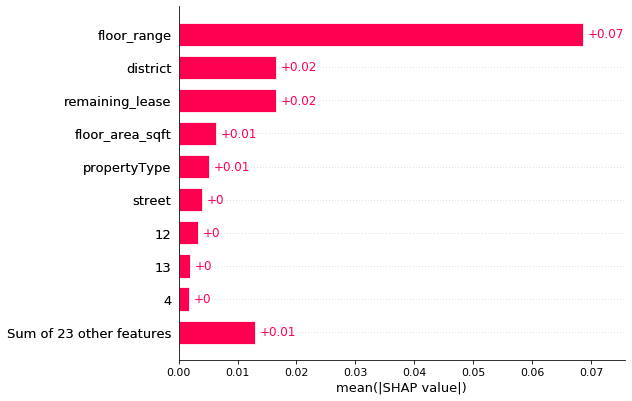

In [39]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(df_test)
shap.plots.bar(shap_values)

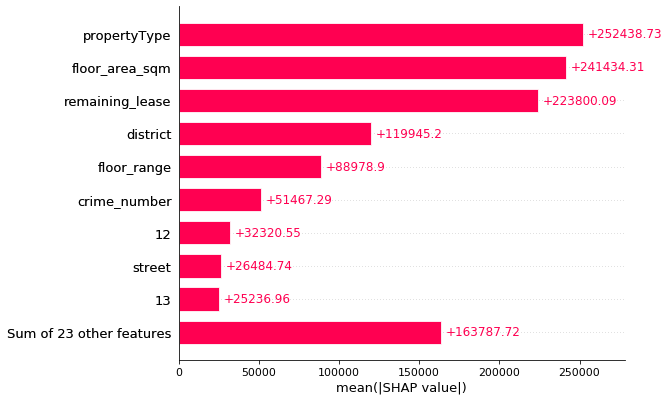

In [16]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(df_test)
shap.plots.bar(shap_values)

## LightGBM

In [333]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV


# Initialise LGBMRegressor
rf = LGBMRegressor(n_estimators=300, subsample=0.9, colsample_bytree=0.2, eval_metric = 'rmse')


# # Set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)


# Pipeline Standardization and Model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# Tuning the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]
my_subsample = [0.7, 0.8, 0.9]
my_colsample_bytree = [0.1, 0.2, 0.3]

# Run the model using GridSearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = RandomizedSearchCV(estimator=pipeline
                            , cv=cv
                            , param_distributions =dict(model__min_samples_leaf = my_min_samples_leaf, 
                                               model__max_depth = my_max_depth,
                                               model__subsample = my_subsample,
                                               model__colsample_bytree = my_colsample_bytree)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )

# Fitting on Training Data
optimized_rf.fit(OHE_train, y_train)


# Best model estimators
print(optimized_rf.best_estimator_)

def adjusted_r2(r2, n, p):
  result = 1-((1-r2)*((n-1)/(n-p-1)))
  return result


# Evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = optimized_rf.predict(OHE_train)
y_pred = optimized_rf.predict(OHE_test)
n1 = len(y_train_pred)
p1 = OHE_train.shape[1]
n2 = len(y_pred)
p2 = OHE_test.shape[1]
print('Training Errors')
print("Mean Squared Error: ", mean_squared_error(y_train, y_train_pred))
print("RMSE: ", mean_squared_error(y_train, y_train_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_train_pred))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(y_train, y_train_pred), n1, p1))

print('Test Errors')
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared = False))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))
print("Adjusted R2: ", adjusted_r2(r2_score(y_test, y_pred), n2, p2))


def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)


print('Training sMAPE')
print(smape(y_train_pred, y_train))
print('Testing sMAPE')
print(smape(y_pred, y_test))

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

print('Training MAPE')
print(mape(y_train_pred, y_train))
print('Testing MAPE')
print(mape(y_pred, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 LGBMRegressor(colsample_bytree=0.3, eval_metric='rmse',
                               max_depth=7, min_samples_leaf=10,
                               n_estimators=300, subsample=0.8))])
Training Errors
Mean Squared Error:  0.00035410918013020434
RMSE:  0.018817788927772687
Mean Absolute Error:  0.010195102517518345
R-squared:  0.9643621865852059
Adjusted R2:  0.964349387657805
Test Errors
Mean Squared Error:  0.0008470740456911753
RMSE:  0.02910453651393843
Mean Absolute Error:  0.017671818145830298
R-squared:  0.9225893314068299
Adjusted R2:  0.9225353878647689
Training sMAPE
7.583096677658371
Testing sMAPE
12.087947603785842
Training MAPE
7.58353370728957

> Residual Plot (for Test Data)

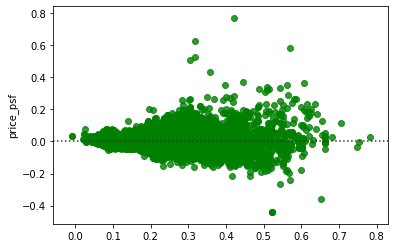

In [337]:
sns.residplot(y_pred.reshape(-1), y_test, color="g")

> Residual Plot (for Training Data)

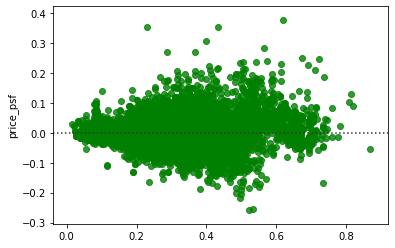

In [338]:
sns.residplot(y_train_pred.reshape(-1), y_train, color="g")